## 1. 最常见的 CNNs架构

![](http://www.aiportal.net/wp-content/uploads/2017/12/CNNs%E6%9E%B6%E6%9E%84.png)

## 2. 使用Keras建立你的第一个CNNs模型的具体步骤：

1. 导入库和模块

2. 从 MNIST 加载图像数据

3. 预处理图像数据

4. 预处理分类标签

5. 定义模型架构

6. 编译模型

7. 训练模型

8. 评估模型

### 2.1 第一步：导入库和模块

导入numpy。numpy可用于进行数组运算。

In [1]:
import numpy as np

接下来，我们从 `Keras` 中导入 `Sequential`，它是多个网络层的线性堆叠。

简单来说，把 `Sequential` 想象成一个书架，每本书都是一个“网络层”，只要有了“书架”，你就可以把“书”一本本的堆叠上去。

![](http://www.aiportal.net/wp-content/uploads/2017/12/%E4%B9%A6%E6%9E%B6-small.jpg)

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


之后，依次导入

![](http://www.aiportal.net/wp-content/uploads/2017/12/%E5%90%84%E7%BD%91%E7%BB%9C%E5%B1%82.png)

这些“网络层”，相当于上面书架中的“图书”。将这些“网络层”堆叠起来，就构成了文章开篇所提到的“最常见的CNNs架构”模式。

In [31]:
# from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout

最后，我们从Keras导入 `np_utils`，它能帮助我们将数据形态转换为我们想要的样子。

In [4]:
from keras.utils import np_utils

### 2.2 第二步：从MNIST加载图像数据

In [10]:
from keras.datasets import mnist
 
# 加载MNIST数据集，其中包含60,000个训练样本、10,000个测试样本
(X_train, y_train), (X_test, y_test) = mnist.load_data()

通过print，我们能够看到数据集的形态：

In [11]:
print(X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


X_train是一个含有60,000个训练样本的数据集，并且，每一个样本图像的尺寸都是 $28*28$，例如，第1个训练样本为：

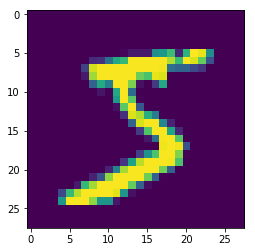

In [12]:
from matplotlib import pyplot as plt
 
# 绘制第1个训练样本
plt.imshow(X_train[0])
plt.show()

看样子，上面的数字有可能是3，有可能是5。但是不管怎样，我们已经清楚地看到，X_train中的每一个样本，都是一张 $28*28$ 的手写数字图。

接下来，我们再来看看y_train:

In [13]:
print(y_train.shape)
# (60000, )

(60000,)


y_train是60,000个训练样本的标签，例如，第1个训练样本的标签为“5”：

In [14]:
print(y_train[0])
# 5

5


好吧，原来上面那张歪歪扭扭的数字，不是3……

使用同样的方法，我们还可以查看测试集的数据形态，在这里，我们有10,000个测试样本：

In [15]:
print(X_test.shape)
# (10000, 28, 28)

(10000, 28, 28)


**温馨提示：**

无论是训练集，还是测试集，这里y的形态，都与X的不太一样

例如，

    X_train.shape=(60000, 28, 28)

而 
    
    y_train.shape=(60000, )

后面我们会将它们的形态进行调整，使它们保持一致，并符合图像识别的格式要求。

### 2.3 第三步：预处理图像数据

在CNNs中，图像不仅有“宽度”和“高度”，而且还有深度。

对于彩色图片，图像的深度为3，即有“红R，绿G，蓝B”3个通道；

对于像MNIST这样的灰度图片，其图像深度仅为1：

![](http://www.aiportal.net/wp-content/uploads/2017/12/%E5%9B%BE%E5%83%8F%E6%B7%B1%E5%BA%A6-small.jpg)

所以，我们数据集的形态，应该从

 **<center>(样本数量, 图片宽度, 图片高度)</center>**

转换为 

 **<center>(样本数量, <font color="red">图片深度</font>, 图片宽度, 图片高度)</center>**
 
 实现这一转换的方式很简单：

In [46]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

为了确保我们的确已经将格式转换过来了，再次打印X_train.shape查看：

In [47]:
print(X_train.shape)
# (60000, 1, 28, 28)

(60000, 28, 28, 1)


OK，（样本数量,  图片深度, 图片宽度,  图片高度）我们已全都具备。
预处理的最后一步，是将我们输入的数据，转换为float32类型，并且，将数值范围从[0, 255]标准化到[0, 1]范围内：

In [48]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### 2.4 第四步：预处理分类标签

在第二步的时候，我们已经提到了，分类标签y的数据形态，似乎与图像X的有些不同。

实际上，我们有“0~9”一共十个不同的类标签。

我们期待看到这样的格式：

![](http://www.aiportal.net/wp-content/uploads/2017/12/%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E6%A0%BC%E5%BC%8F.png)

以此类推……

但是，我们现在的y值，一上来就是 0,1,2, …… , 9。

因此，我们需要对其进行转换：

In [49]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

转换后的结果，我们来看一下：

In [50]:
print(Y_train.shape)
# (60000, 10)
 
print(Y_train[0])
# [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


还记得我们将X_train形态转换后，得到的样子吗？

X_train.shape=(60000, 1, 28, 28)

表示“有60,000个样本，每个样本的维度为（$1*28*28$）”

这里，经过转换后的Y_train的形态为

Y_train.shape=(60000, 10)

表示“有60,000个样本，每个样本的维度为10”

**请记住上面的数据形态，只有当我们输入数据（X，Y）符合上述形态时，代码才会正常运行。**

### 2.5 第五步：定义模型架构

经过前四步，我们已经把所有的准备工作都做好了。现在，我们开始定义模型。

回忆我们在开篇提到的“CNNs架构”

再次祭上这张神图……

![](http://www.aiportal.net/wp-content/uploads/2017/12/CNNs%E6%9E%B6%E6%9E%84.png)

“定义模型架构”，意味着我们要确定图中“若干次”的具体次数。

在本例中，我们将使用这样的架构：

![](http://www.aiportal.net/wp-content/uploads/2017/12/5-0%E6%8D%A2.png)

当然，“若干次”的具体次数该如何来设定，并没有硬性的规定。

你可以尝试构建不同的模式，并从中选择一个预测准确度最高的模型来使用。

我们在这里使用了“2次 – 1次 – 2次”的结构。

好啦，废话不多说，直接上代码。

先搭一个“书架”：

In [51]:
model = Sequential()

再往“model”中，添加各层。

添加第1个“卷积 → ReLU”：

In [52]:
# 添加第一个卷积层，其中，超参数32,3,3分别表示“过滤器的个数、过滤器的宽、过滤器的高”
# input_shape = (1, 28, 28)表示“输入图片的深度为1，宽度为28，高度为28”
# model.add(Convolution2D(32, 3, 3, input_shape=(1, 28, 28)))
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))

# 添加激活层（ReLU）
model.add(Activation('relu'))

过滤器的作用是提取图片的特征，通常情况下，过滤器的个数由你自己来决定，这里设置了32个过滤器。

过滤器的大小，你可以设置为 $3*3$，也可以设置为 $5*5$，都是较为常用的尺寸。

经过第1个“卷积 → ReLU”的处理，我们来看看得到了什么：

In [53]:
print(model.output_shape)
# (None, 32, 26, 26)

(None, 26, 26, 32)


输出的结果是，大小为 $26*26$，一共 $32$ 张图片。

> 为什么是32张图片？

> 这32张图片长得什么样子？

> 为什么图片尺寸比输入时变小了？

> 想要了解具体原理的同学，可以参考下面两篇教程：

> [《吊炸天的CNNs，这是我见过最详尽的图解！（上）》](http://www.aiportal.net/cnns/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%85%A5%E9%97%A8%E6%95%99%E7%A8%8B-%E6%BB%A4%E6%B3%A2%E5%99%A8-%E6%8F%90%E5%8F%96%E7%89%B9%E5%BE%81)

> [《吊炸天的CNNs，这是我见过最详尽的图解！（下）》](http://www.aiportal.net/cnns/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%85%A5%E9%97%A8%E6%95%99%E7%A8%8B-%E6%B1%A0%E5%8C%96-%E5%85%A8%E8%BF%9E%E6%8E%A5-%E5%BD%A9%E8%89%B2%E5%9B%BE%E7%89%87%E5%8D%B7%E7%A7%AF)

接下来，我们再添加第2个“卷积 → ReLU”：

In [54]:
# 添加第二个卷积层
# 除第1层卷积外，其余各层卷积均不再需要输入input_shape，算法会自动识别其形态
# model.add(Convolution2D(32,  3,  3))
model.add(Conv2D(32, (3, 3)))
 
# 添加激活层（ReLU）
model.add(Activation('relu'))

然后是“池化层”：

In [55]:
# 添加池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

池化层的作用是将图片缩小。

**举个例子：**

经过上面第2个“卷积 → ReLU”的处理后，输出结果的形态为

（None, 32, 24, 24）

表示“有 $32$ 张 $24*24$ 大小的图片”。

经过“最大池化”的处理后，得到的是

（None, 32, 12, 12）

表示“有 $32$ 张 $12*12$ 大小的图片”，

可以看到，图片的宽、高都缩小了一半。

最后，我们来添加2个全连接层：

In [56]:
# 添加展开层，因为，在“全连接层”之前，需要先将图片的像素值展开
model.add(Flatten())
 
# 添加第1个全连接层
# “128”表示神经元的个数，可以设置为任意数值
model.add(Dense(128, activation='relu'))
 
# 添加dropout层，防止过拟合
model.add(Dropout(0.5))
 
# 添加第2个全连接层
# “10”表示神经元的个数，但是由于本层为CNNs架构的最后一层（即“输出层”），
# 所以，此处的数值只能为“10”，对应“0-9”个数字分类
# “softmax”是非线性函数，输出的结果为“最初输入的图片，属于每种类别的概率”
model.add(Dense(10, activation='softmax'))

### 2.6 第六步：编译模型

刚刚的第五步，我们只是搭起了一个模型的架子，而现在我们需要做的工作是，让模型能够跑起来。

In [57]:
# 编译模型
# 告诉模型，我们的目标是要使得“误差损失：categorical_crossentropy”尽可能小
# 为了实现这一“目标”，所使用的优化方法是：adam
# 使用“准确率：accuracy”来评估模型的预测效果
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 2.7 第七步：训练模型

好啦，构建CNNs，所有最难的部分都已经过去了。

下面，我们就要把数据 “喂给” 模型，让它开始为我们干活儿了！

In [58]:
# 训练模型
# batch_size=32 表示一批处理32个样本
# nb_epoch=10 表示10个周期，每个周期都把全部60,000个样本遍历一遍
# validation_split=0.3 表示从训练样本中拿出30%作为交叉验证集
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 55s - loss: 0.9991 - acc: 0.6678 - val_loss: 0.3502 - val_acc: 0.8981
Epoch 2/10
42000/42000 [==============================] - 56s - loss: 0.4919 - acc: 0.8477 - val_loss: 0.2725 - val_acc: 0.9171
Epoch 3/10
42000/42000 [==============================] - 57s - loss: 0.4343 - acc: 0.8657 - val_loss: 0.2479 - val_acc: 0.9289
Epoch 4/10
42000/42000 [==============================] - 58s - loss: 0.4040 - acc: 0.8760 - val_loss: 0.2240 - val_acc: 0.9342
Epoch 5/10
42000/42000 [==============================] - 60s - loss: 0.3827 - acc: 0.8827 - val_loss: 0.2097 - val_acc: 0.9381
Epoch 6/10
42000/42000 [==============================] - 60s - loss: 0.3629 - acc: 0.8871 - val_loss: 0.2053 - val_acc: 0.9383
Epoch 7/10
42000/42000 [==============================] - 60s - loss: 0.3501 - acc: 0.8897 - val_loss: 0.1888 - val_acc: 0.9439
Epoch 8/10
42000/42000 [==============================

你的屏幕会显示这么一大堆东西：

![](http://www.aiportal.net/wp-content/uploads/2017/12/7-2.jpg)

[原图](http://www.aiportal.net/wp-content/uploads/2017/12/7-2.jpg)

### 2.8 第八步：评估模型

还记得我们在最初加载MNIST数据时，其中含有10,000个测试样本吗？

在代码的最后，我们可以充分利用这10,000个测试样本，来评估我们构建的模型其预测效果：

In [59]:
# 评估模型
score = model.evaluate(X_test,  Y_test)
print(score)

 9984/10000 [============================>.] - ETA: 0s[0.16824836071655155, 0.94750000000000001]


输出结果为：

![](http://www.aiportal.net/wp-content/uploads/2017/12/8-2.jpg)

预测准确度高达0.989。

**下面附上全部代码：**

In [60]:
import numpy as np
from keras.models import Sequential
# from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
 
# 加载MNIST数据集，其中包含60,000个训练样本、10,000个测试样本
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 调整加载数据的形态
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
model = Sequential()
 
# 添加第一个卷积层，其中，超参数32,3,3分别表示“过滤器的个数、过滤器的宽、过滤器的高”
# input_shape = (1, 28, 28)表示“输入图片的深度为1，宽度为28，高度为28”
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
 
# 添加激活层（ReLU）
model.add(Activation('relu'))
 
# 添加第二个卷积层
# 除第1层卷积外，其余各层卷积均不再需要输入input_shape，算法会自动识别其形态
model.add(Conv2D(32, (3, 3)))
 
# 添加激活层（ReLU）
model.add(Activation('relu'))
 
# 添加池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
 
# 添加展开层，因为，在“全连接层”之前，需要先将图片的像素值展开
model.add(Flatten())
 
# 添加第1个全连接层
# “128”表示神经元的个数，可以设置为任意数值
model.add(Dense(128, activation='relu'))
 
# 添加dropout层，防止过拟合
model.add(Dropout(0.5))
 
# 添加第2个全连接层
# “10”表示神经元的个数，但是由于本层为CNNs架构的最后一层（即“输出层”），
# 所以，此处的数值只能为“10”，对应“0-9”个数字分类
# “softmax”是非线性函数，输出的结果为“最初输入的图片，属于每种类别的概率”
model.add(Dense(10, activation='softmax'))
 
 
# 编译模型
# 告诉模型，我们的目标是要使得“误差损失：categorical_crossentropy”尽可能小
# 为了实现这一“目标”，所使用的优化方法是：adam
# 使用“准确率：accuracy”来评估模型的预测效果
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 训练模型
# batch_size=32 表示一批处理32个样本
# nb_epoch=10 表示10个周期，每个周期都把全部60,000个样本遍历一遍
# validation_split=0.3 表示从训练样本中拿出30%作为交叉验证集
model.fit(X_train, Y_train,
          batch_size=32, epochs=10, validation_split=0.3)
 
# 评估模型
score = model.evaluate(X_test,  Y_test)
print(score)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 59s - loss: 0.2395 - acc: 0.9264 - val_loss: 0.0717 - val_acc: 0.9764
Epoch 2/10
42000/42000 [==============================] - 60s - loss: 0.0897 - acc: 0.9725 - val_loss: 0.0503 - val_acc: 0.9852
Epoch 3/10
42000/42000 [==============================] - 62s - loss: 0.0671 - acc: 0.9799 - val_loss: 0.0480 - val_acc: 0.9852
Epoch 4/10
42000/42000 [==============================] - 63s - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0383 - val_acc: 0.9886
Epoch 5/10
42000/42000 [==============================] - 63s - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0406 - val_acc: 0.9876
Epoch 6/10
42000/42000 [==============================] - 61s - loss: 0.0349 - acc: 0.9886 - val_loss: 0.0445 - val_acc: 0.9874
Epoch 7/10
42000/42000 [==============================] - 63s - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0383 - val_acc: 0.9898
Epoch 8/10
42000/42000 [==============================

## Reference

[keras教程：卷积神经网络（CNNs）终极入门指南](http://www.aiportal.net/cnns/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C-%E5%9B%BE%E5%83%8F%E8%AF%86%E5%88%AB-keras%E4%BB%A3%E7%A0%81)

[关于Keras 2.0版本运行demo出错的问题](https://blog.csdn.net/JohinieLi/article/details/69222956)

[Negative dimension size caused by subtracting 3 from 1 for 'conv2d_2/convolution'](https://stackoverflow.com/questions/45645276/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d-2-convolution/45647715#45647715)

[Keras 快速上手指南（中）：模型与网络层](http://xiaosheng.me/2017/07/05/article78/)

[Keras:基于Python的深度学习库](http://keras-cn.readthedocs.io/en/latest/)

![Sample CNN](../images/sample_cnn.png)